#### 1. Add data

In [325]:
# import library
import pandas as pd
pd.set_option('display.max_columns', 1500)
# Install matplotlib
!pip install matplotlib

# Import matplotlib
import matplotlib.pyplot as plt
# hide warning messages
import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# read data from zip file
data = pd.read_csv('dataset_landslide.csv')


# Assignment 2 also aspect has an error where "slump should be S" change that fix that, for area region you can do onehot encoding, the next 5 are coordinates, take out utm columns all three, keep lat and long. slides with onehot encoding, label encoding is not the way. the last two you can drop. keep landslide name as is, area one hot encoding, keep areas. aspect is one hot encoding, all numbers should be mean max scalar. 

In [326]:
data.head(5)

,Sample label,Area (Region),UTM east [m],UTM north [m],UTM Zone,Latitude,Longitude,Vol [m**3],Volume LCL [%],Volume UCL [%],Area [m**2],Elev mean [m a.s.l.],Relief mean [m],Curvature mean,Aspect,Slope [deg] (mean),Slope [deg] (pre),Carb [%],Clastics [%] (Fine clastic),Evaporite [%],Clastics [%] (Coarse clastic),Distance [m] (from fold),Distance [m] (from fault),Distance [m] (from B-fault),Distance [m] (from river),Distance [m] (from drainage),Slide (Slide type),Surf descr (Constructed surface),Position (Source or Debris area)
0,L1,Western Zagros (Lorestan),312185.45,3709557.18,39R,33.509090,48.977950,60482600,10,20,1343530,1994.58,1523.04,0.078189,NE,18,14,50,50,0,0,30954.22,1551.54,73652.48,62941.98,571.04,Earth slide,Beneath surface,Source area
1,L2,Western Zagros (Lorestan),190623.40,3679054.67,38S,33.206178,47.681184,17348800,5,10,680573,1130.53,1364.11,-0.056317,E,20,27,75,0,0,25,19.11,5857.57,3480.28,3627.51,378.25,Earth slide,Beneath surface,Source area
2,L3,Western Zagros (Lorestan),201216.10,3677046.62,39R,33.191071,47.795318,967077,5,10,78350,916.95,726.22,-0.020998,S,10,13,100,0,0,0,3233.89,2222.71,4390.10,7047.74,694.33,Earth slide,Beneath surface,Debris area
3,L4,Western Zagros (Lorestan),202383.74,3676563.61,39R,33.187043,47.807983,1120670,5,5,172811,917.87,677.34,0.002125,SW,6,13,100,0,0,0,3420.80,2383.70,5117.53,8167.99,717.86,Earth slide,Beneath surface,Debris area
4,L5,Western Zagros (Lorestan),192868.96,3698043.79,38S,33.377814,47.698798,38911200,5,5,991903,1421.61,963.62,-0.127624,NE,17,15,75,0,0,25,155.50,10508.98,8585.29,13137.74,232.54,Slump,Beneath surface,Source area


# use landslide data and use knn data 

In [327]:
! pip install --upgrade category_encoders
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from category_encoders import TargetEncoder
from copy import deepcopy 



# Your preprocessing code here...

df=data.copy()
df=df.drop('Sample label',axis=1)
df=df.drop('UTM east [m]',axis=1)
df=df.drop('UTM north [m]',axis=1)
df=df.drop('UTM Zone',axis=1)
df=df.drop('Surf descr (Constructed surface)',axis=1)
df=df.drop('Position (Source or Debris area)',axis=1)
df

#fix ascpect error 
df['Aspect'] = df['Aspect'].replace({'Slump': 'S'})
X = df.drop(['Vol [m**3]'], axis=1)
Y = df['Vol [m**3]']



                  

In [328]:
drop_col = []

for col in X.columns:
    if X[col].dtype == 'object': 
        if len(X[col].unique()) < 3:
            print("OneHot Encoder", col)
            OHE = OneHotEncoder(handle_unknown='ignore', sparse=False)
            X_encoded = OHE.fit_transform(X[[col]])
            X_encoded_df = pd.DataFrame(X_encoded, columns=[col + '_' + str(i) for i in range(X_encoded.shape[1])])
            X = pd.concat([X, X_encoded_df], axis=1)
            drop_col.append(col)
        else:
            print("Target Encoder", col)
            TRGT = TargetEncoder()
            X[col+"_trgt"] = TRGT.fit_transform(X[[col]], Y)
            drop_col.append(col)
    elif np.issubdtype(X[col].dtype, np.number):
        print("MinMax scale of ", col)
        scalar = MinMaxScaler()
        X_scaled = scalar.fit_transform(X[[col]])
        X_scaled_df = pd.DataFrame(X_scaled, columns= [col+ '_normalized'], index=X.index)
        X = pd.concat([X, X_scaled_df], axis=1)
        drop_col.append(col)
  
        

OneHot Encoder Area (Region)
MinMax scale of  Latitude
MinMax scale of  Longitude
MinMax scale of  Volume LCL [%]
MinMax scale of  Volume UCL [%]
MinMax scale of  Area [m**2]
MinMax scale of  Elev mean [m a.s.l.]
MinMax scale of  Relief mean [m]
MinMax scale of  Curvature mean
Target Encoder Aspect
MinMax scale of  Slope [deg] (mean)
MinMax scale of  Slope [deg] (pre)
MinMax scale of  Carb [%]
MinMax scale of  Clastics [%] (Fine clastic)
MinMax scale of  Evaporite [%]
MinMax scale of  Clastics [%] (Coarse clastic)
MinMax scale of  Distance [m] (from fold)
MinMax scale of  Distance [m] (from fault)
MinMax scale of  Distance [m] (from B-fault)
MinMax scale of  Distance [m] (from river)
MinMax scale of  Distance [m] (from drainage)
Target Encoder Slide (Slide type)


In [329]:
# Extract original column names from X
original_columns = df.columns.difference(X.columns)

# Drop the original columns from df
df.drop(columns=original_columns, inplace=True)

# Concatenate the processed columns from X to df
df = pd.concat([df, X], axis=1)

# Print the head of df to verify the changes
print(df.head(8))



               Area (Region)   Latitude  Longitude  Volume LCL [%]  \
0  Western Zagros (Lorestan)  33.509090  48.977950              10   
1  Western Zagros (Lorestan)  33.206178  47.681184               5   
2  Western Zagros (Lorestan)  33.191071  47.795318               5   
3  Western Zagros (Lorestan)  33.187043  47.807983               5   
4  Western Zagros (Lorestan)  33.377814  47.698798               5   
5  Western Zagros (Lorestan)  30.937517  50.782782               5   
6  Western Zagros (Lorestan)  30.859593  50.867274               5   
7  Western Zagros (Lorestan)  30.837983  50.880106               5   

   Volume UCL [%]  Area [m**2]  Elev mean [m a.s.l.]  Relief mean [m]  \
0              20      1343530               1994.58          1523.04   
1              10       680573               1130.53          1364.11   
2              10        78350                916.95           726.22   
3               5       172811                917.87           677.34   
4   

In [330]:
df.head(5)


,Area (Region),Latitude,Longitude,Volume LCL [%],Volume UCL [%],Area [m**2],Elev mean [m a.s.l.],Relief mean [m],Curvature mean,Aspect,Slope [deg] (mean),Slope [deg] (pre),Carb [%],Clastics [%] (Fine clastic),Evaporite [%],Clastics [%] (Coarse clastic),Distance [m] (from fold),Distance [m] (from fault),Distance [m] (from B-fault),Distance [m] (from river),Distance [m] (from drainage),Slide (Slide type),Area (Region),Latitude,Longitude,Volume LCL [%],Volume UCL [%],Area [m**2],Elev mean [m a.s.l.],Relief mean [m],Curvature mean,Aspect,Slope [deg] (mean),Slope [deg] (pre),Carb [%],Clastics [%] (Fine clastic),Evaporite [%],Clastics [%] (Coarse clastic),Distance [m] (from fold),Distance [m] (from fault),Distance [m] (from B-fault),Distance [m] (from river),Distance [m] (from drainage),Slide (Slide type),Area (Region)_0,Area (Region)_1,Latitude_normalized,Longitude_normalized,Volume LCL [%]_normalized,Volume UCL [%]_normalized,Area [m**2]_normalized,Elev mean [m a.s.l.]_normalized,Relief mean [m]_normalized,Curvature mean_normalized,Aspect_trgt,Slope [deg] (mean)_normalized,Slope [deg] (pre)_normalized,Carb [%]_normalized,Clastics [%] (Fine clastic)_normalized,Evaporite [%]_normalized,Clastics [%] (Coarse clastic)_normalized,Distance [m] (from fold)_normalized,Distance [m] (from fault)_normalized,Distance [m] (from B-fault)_normalized,Distance [m] (from river)_normalized,Distance [m] (from drainage)_normalized,Slide (Slide type)_trgt
0,Western Zagros (Lorestan),33.509090,48.977950,10,20,1343530,1994.58,1523.04,0.078189,NE,18,14,50,50,0,0,30954.22,1551.54,73652.48,62941.98,571.04,Earth slide,Western Zagros (Lorestan),33.509090,48.977950,10,20,1343530,1994.58,1523.04,0.078189,NE,18,14,50,50,0,0,30954.22,1551.54,73652.48,62941.98,571.04,Earth slide,0.0,1.0,0.861018,0.299814,0.333333,0.6,0.012893,0.689341,0.547322,0.709167,4.855994e+08,0.400000,0.195652,0.50,0.5,0.0,0.00,0.746393,0.066229,0.418770,0.348551,0.090133,8.833914e+07
1,Western Zagros (Lorestan),33.206178,47.681184,5,10,680573,1130.53,1364.11,-0.056317,E,20,27,75,0,0,25,19.11,5857.57,3480.28,3627.51,378.25,Earth slide,Western Zagros (Lorestan),33.206178,47.681184,5,10,680573,1130.53,1364.11,-0.056317,E,20,27,75,0,0,25,19.11,5857.57,3480.28,3627.51,378.25,Earth slide,0.0,1.0,0.822441,0.167636,0.000000,0.2,0.006518,0.382922,0.473544,0.590716,2.465528e+08,0.466667,0.478261,0.75,0.0,0.0,0.25,0.000000,0.251698,0.019731,0.019577,0.059555,8.833914e+07
2,Western Zagros (Lorestan),33.191071,47.795318,5,10,78350,916.95,726.22,-0.020998,S,10,13,100,0,0,0,3233.89,2222.71,4390.10,7047.74,694.33,Earth slide,Western Zagros (Lorestan),33.191071,47.795318,5,10,78350,916.95,726.22,-0.020998,S,10,13,100,0,0,0,3233.89,2222.71,4390.10,7047.74,694.33,Earth slide,0.0,1.0,0.820517,0.179270,0.000000,0.2,0.000727,0.307181,0.177424,0.621819,1.270993e+08,0.133333,0.173913,1.00,0.0,0.0,0.00,0.077565,0.095137,0.024905,0.038547,0.109688,8.833914e+07
3,Western Zagros (Lorestan),33.187043,47.807983,5,5,172811,917.87,677.34,0.002125,SW,6,13,100,0,0,0,3420.80,2383.70,5117.53,8167.99,717.86,Earth slide,Western Zagros (Lorestan),33.187043,47.807983,5,5,172811,917.87,677.34,0.002125,SW,6,13,100,0,0,0,3420.80,2383.70,5117.53,8167.99,717.86,Earth slide,0.0,1.0,0.820004,0.180561,0.000000,0.0,0.001636,0.307507,0.154733,0.642182,1.940464e+08,0.000000,0.173913,1.00,0.0,0.0,0.00,0.082075,0.102072,0.029041,0.044760,0.113420,8.833914e+07
4,Western Zagros (Lorestan),33.377814,47.698798,5,5,991903,1421.61,963.62,-0.127624,NE,17,15,75,0,0,25,155.50,10508.98,8585.29,13137.74,232.54,Slump,Western Zagros (Lorestan),33.377814,47.698798,5,5,991903,1421.61,963.62,-0.127624,NE,17,15,75,0,0,25,155.50,10508.98,8585.29,13137.74,232.54,Slump,0.0,1.0,0.844300,0.169432,0.000000,0.0,0.009512,0.486148,0.287630,0.527919,4.855994e+08,0.366667,0.217391,0.75,0.0,0.0,0.25,0.003291,0.452043,0.048761,0.072324,0.036445,2.876099e+08


In [331]:
# List of original columns to remove
original_columns_to_remove = [
    'Area (Region)', 'Latitude', 'Longitude', 'Volume LCL [%]', 'Volume UCL [%]',
    'Area [m**2]', 'Elev mean [m a.s.l.]', 'Relief mean [m]', 'Curvature mean', 
    'Aspect', 'Slope [deg] (mean)', 'Slope [deg] (pre)', 'Carb [%]', 
    'Clastics [%] (Fine clastic)', 'Evaporite [%]', 'Clastics [%] (Coarse clastic)', 
    'Distance [m] (from fold)', 'Distance [m] (from fault)', 'Distance [m] (from B-fault)', 
    'Distance [m] (from river)', 'Distance [m] (from drainage)', 'Slide (Slide type)'
]

# Drop the original columns from the DataFrame
df.drop(columns=original_columns_to_remove, inplace=True)
df['Vol [m**3]'] = Y
# Print the head of df to verify the changes
df.head(8)



,Area (Region)_0,Area (Region)_1,Latitude_normalized,Longitude_normalized,Volume LCL [%]_normalized,Volume UCL [%]_normalized,Area [m**2]_normalized,Elev mean [m a.s.l.]_normalized,Relief mean [m]_normalized,Curvature mean_normalized,Aspect_trgt,Slope [deg] (mean)_normalized,Slope [deg] (pre)_normalized,Carb [%]_normalized,Clastics [%] (Fine clastic)_normalized,Evaporite [%]_normalized,Clastics [%] (Coarse clastic)_normalized,Distance [m] (from fold)_normalized,Distance [m] (from fault)_normalized,Distance [m] (from B-fault)_normalized,Distance [m] (from river)_normalized,Distance [m] (from drainage)_normalized,Slide (Slide type)_trgt,Vol [m**3]
0,0.0,1.0,0.861018,0.299814,0.333333,0.6,0.012893,0.689341,0.547322,0.709167,4.855994e+08,0.400000,0.195652,0.50,0.5,0.0,0.00,0.746393,0.066229,0.418770,0.348551,0.090133,8.833914e+07,60482600
1,0.0,1.0,0.822441,0.167636,0.000000,0.2,0.006518,0.382922,0.473544,0.590716,2.465528e+08,0.466667,0.478261,0.75,0.0,0.0,0.25,0.000000,0.251698,0.019731,0.019577,0.059555,8.833914e+07,17348800
2,0.0,1.0,0.820517,0.179270,0.000000,0.2,0.000727,0.307181,0.177424,0.621819,1.270993e+08,0.133333,0.173913,1.00,0.0,0.0,0.00,0.077565,0.095137,0.024905,0.038547,0.109688,8.833914e+07,967077
3,0.0,1.0,0.820004,0.180561,0.000000,0.0,0.001636,0.307507,0.154733,0.642182,1.940464e+08,0.000000,0.173913,1.00,0.0,0.0,0.00,0.082075,0.102072,0.029041,0.044760,0.113420,8.833914e+07,1120670
4,0.0,1.0,0.844300,0.169432,0.000000,0.0,0.009512,0.486148,0.287630,0.527919,4.855994e+08,0.366667,0.217391,0.75,0.0,0.0,0.25,0.003291,0.452043,0.048761,0.072324,0.036445,2.876099e+08,38911200
5,0.0,1.0,0.533519,0.483778,0.000000,0.0,0.196114,0.864741,0.905053,0.630278,1.940464e+08,0.700000,0.195652,0.60,0.4,0.0,0.00,0.009778,0.287078,0.057730,0.034601,0.745208,6.588929e+08,3879690000
6,0.0,1.0,0.523595,0.492390,0.000000,0.2,0.017119,0.923311,0.988636,0.531508,1.940464e+08,0.800000,0.500000,0.60,0.4,0.0,0.00,0.035966,0.377199,0.035579,0.039822,0.168083,6.588929e+08,143248000
7,0.0,1.0,0.520843,0.493698,0.000000,0.0,0.011686,0.823784,0.977625,0.650371,1.940464e+08,1.000000,0.260870,0.60,0.4,0.0,0.00,0.049094,0.306194,0.026384,0.037986,0.162319,6.588929e+08,92872700


<Axes: >

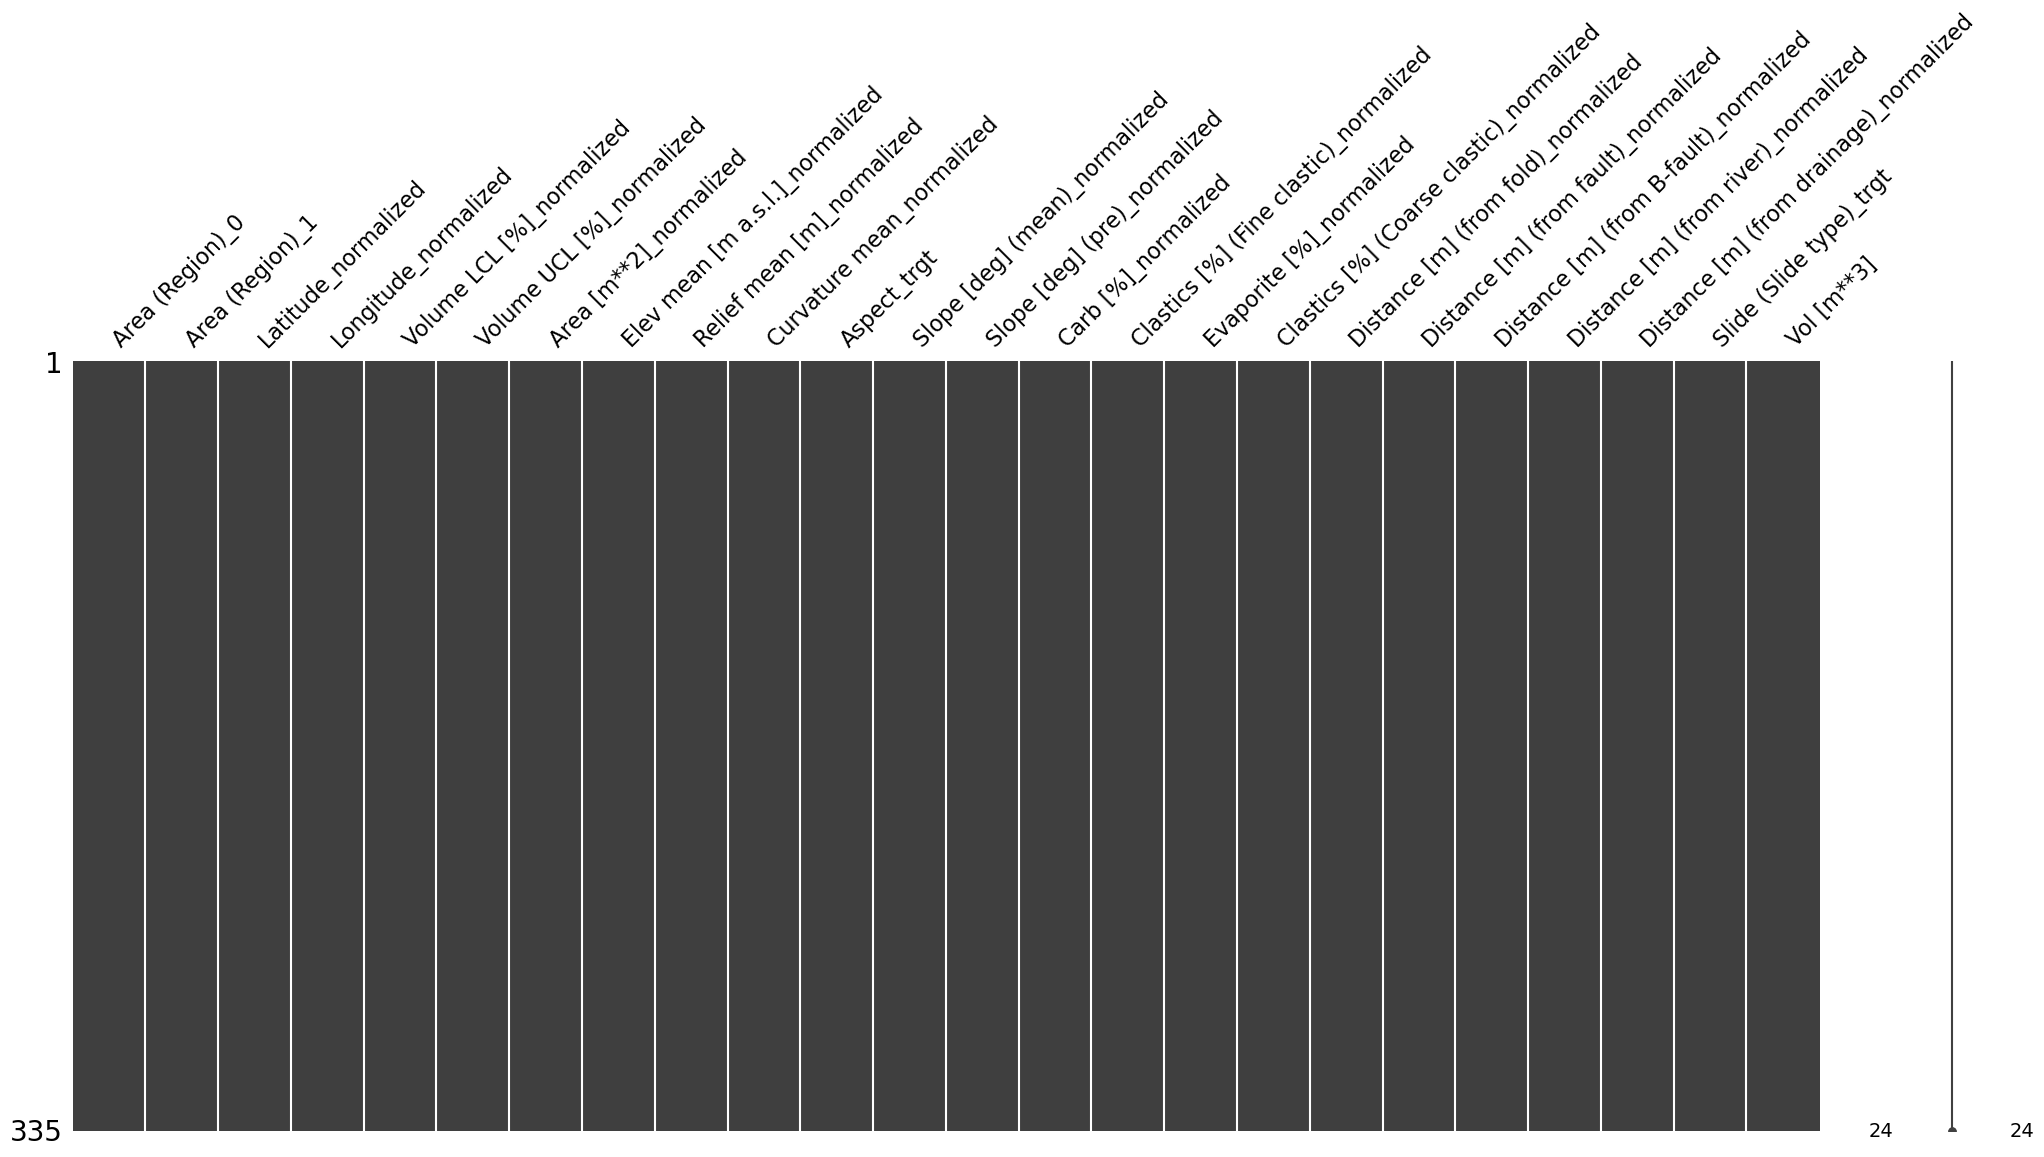

In [332]:
import missingno as msno
msno.matrix(df)

<Axes: >

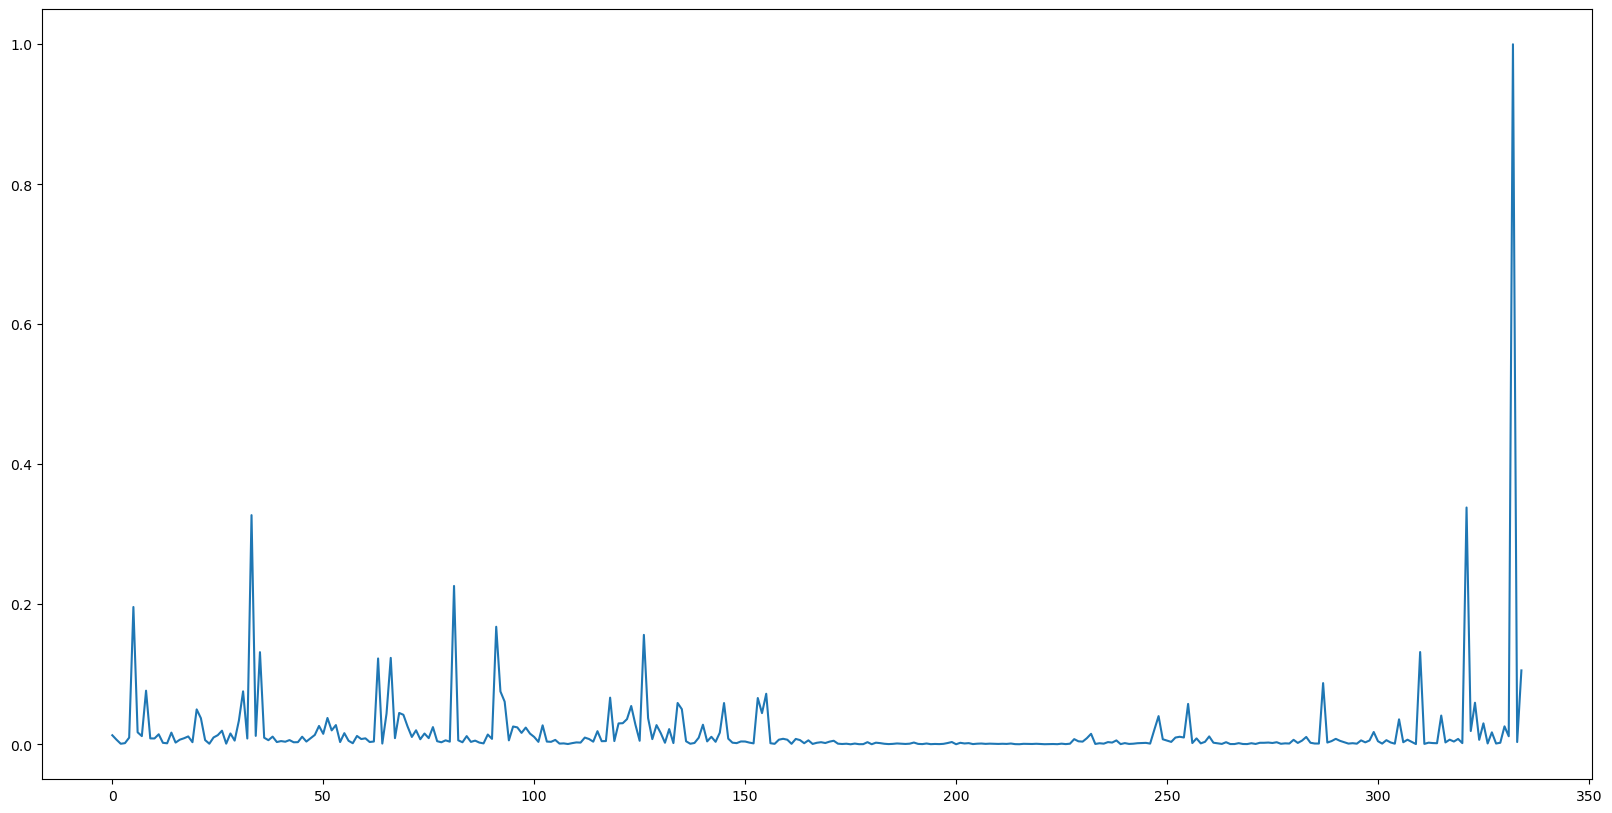

In [333]:
values=df['Area [m**2]_normalized'].dropna()
values.plot(figsize=(20,10))

<Axes: >

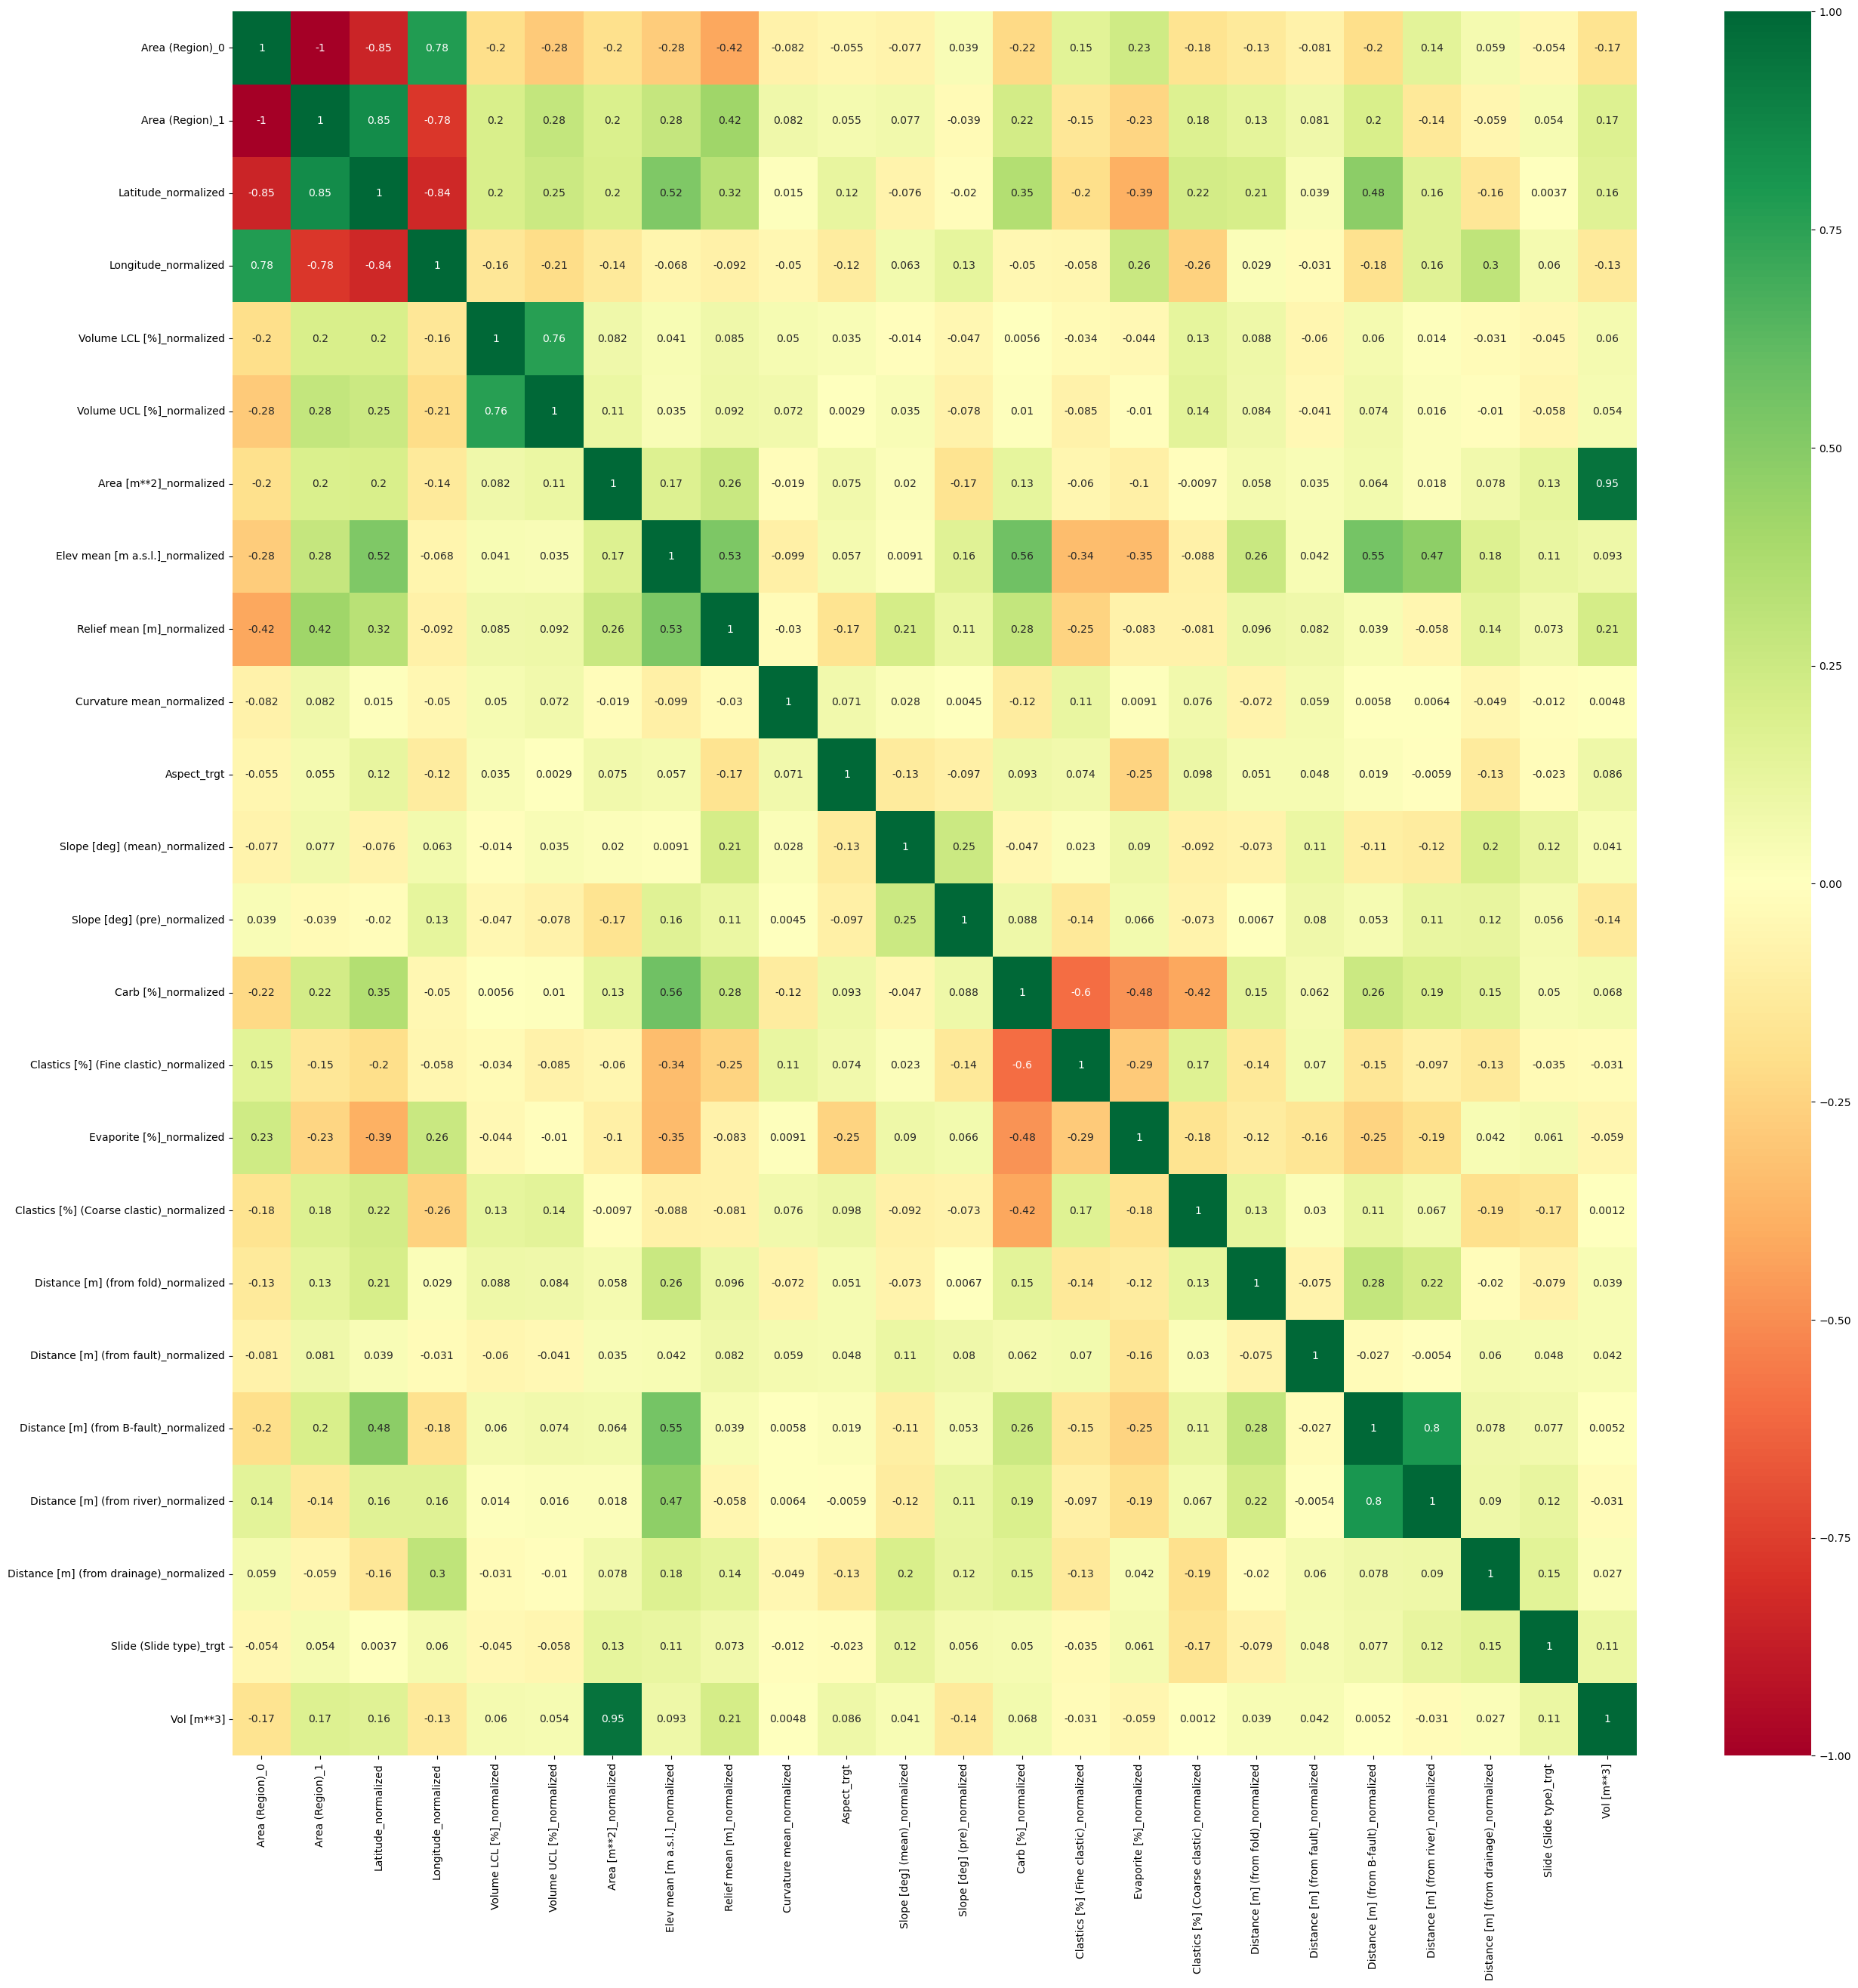

In [334]:
import seaborn as sns
import matplotlib.pyplot as plt

# -- heat map to see corrolation between features
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))

# -- plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn",) 

In [335]:
# Check unique values and their counts in the "Slide (Slide type)" column
slide_type_counts = df['Slide (Slide type)_trgt'].value_counts()
print(slide_type_counts)


Slide (Slide type)_trgt
2.876099e+08    142
8.833914e+07     86
6.588929e+08     72
8.674981e+07     35
Name: count, dtype: int64


In [336]:
# Convert Volume and Area columns to logarithmic data




df['Vol [m**3]'] = np.log(df['Vol [m**3]'])
#df['Area [m**2]_normalized'] = np.log(df['Area [m**2]_normalized'])
df.head(5)

,Area (Region)_0,Area (Region)_1,Latitude_normalized,Longitude_normalized,Volume LCL [%]_normalized,Volume UCL [%]_normalized,Area [m**2]_normalized,Elev mean [m a.s.l.]_normalized,Relief mean [m]_normalized,Curvature mean_normalized,Aspect_trgt,Slope [deg] (mean)_normalized,Slope [deg] (pre)_normalized,Carb [%]_normalized,Clastics [%] (Fine clastic)_normalized,Evaporite [%]_normalized,Clastics [%] (Coarse clastic)_normalized,Distance [m] (from fold)_normalized,Distance [m] (from fault)_normalized,Distance [m] (from B-fault)_normalized,Distance [m] (from river)_normalized,Distance [m] (from drainage)_normalized,Slide (Slide type)_trgt,Vol [m**3]
0,0.0,1.0,0.861018,0.299814,0.333333,0.6,0.012893,0.689341,0.547322,0.709167,4.855994e+08,0.400000,0.195652,0.50,0.5,0.0,0.00,0.746393,0.066229,0.418770,0.348551,0.090133,8.833914e+07,17.917866
1,0.0,1.0,0.822441,0.167636,0.000000,0.2,0.006518,0.382922,0.473544,0.590716,2.465528e+08,0.466667,0.478261,0.75,0.0,0.0,0.25,0.000000,0.251698,0.019731,0.019577,0.059555,8.833914e+07,16.669034
2,0.0,1.0,0.820517,0.179270,0.000000,0.2,0.000727,0.307181,0.177424,0.621819,1.270993e+08,0.133333,0.173913,1.00,0.0,0.0,0.00,0.077565,0.095137,0.024905,0.038547,0.109688,8.833914e+07,13.782033
3,0.0,1.0,0.820004,0.180561,0.000000,0.0,0.001636,0.307507,0.154733,0.642182,1.940464e+08,0.000000,0.173913,1.00,0.0,0.0,0.00,0.082075,0.102072,0.029041,0.044760,0.113420,8.833914e+07,13.929437
4,0.0,1.0,0.844300,0.169432,0.000000,0.0,0.009512,0.486148,0.287630,0.527919,4.855994e+08,0.366667,0.217391,0.75,0.0,0.0,0.25,0.003291,0.452043,0.048761,0.072324,0.036445,2.876099e+08,17.476793


In [337]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Assuming X contains the features and y contains the target variable (volume)
# X should include all the features except 'Vol [m**3]'
X = df.drop('Vol [m**3]', axis=1)
y = df['Vol [m**3]']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the KNN regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Train the model
knn_reg.fit(X_train_scaled, y_train)

# Evaluate the model
train_score = knn_reg.score(X_train_scaled, y_train)
test_score = knn_reg.score(X_test_scaled, y_test)

print("Train R^2 Score:", train_score)
print("Test R^2 Score:", test_score)


Train R^2 Score: 0.6733381406234886
Test R^2 Score: 0.34744986411563883


In [338]:
# Check for NaN values
print("NaN values in the DataFrame:")
print(df.isnull().sum())

# Check for infinite values
print("\nInfinite values in the DataFrame:")
print(np.isinf(df).sum())

# Handle NaN and Infinite values as needed

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


NaN values in the DataFrame:
Area (Region)_0                             0
Area (Region)_1                             0
Latitude_normalized                         0
Longitude_normalized                        0
Volume LCL [%]_normalized                   0
Volume UCL [%]_normalized                   0
Area [m**2]_normalized                      0
Elev mean [m a.s.l.]_normalized             0
Relief mean [m]_normalized                  0
Curvature mean_normalized                   0
Aspect_trgt                                 0
Slope [deg] (mean)_normalized               0
Slope [deg] (pre)_normalized                0
Carb [%]_normalized                         0
Clastics [%] (Fine clastic)_normalized      0
Evaporite [%]_normalized                    0
Clastics [%] (Coarse clastic)_normalized    0
Distance [m] (from fold)_normalized         0
Distance [m] (from fault)_normalized        0
Distance [m] (from B-fault)_normalized      0
Distance [m] (from river)_normalized        0
Dista

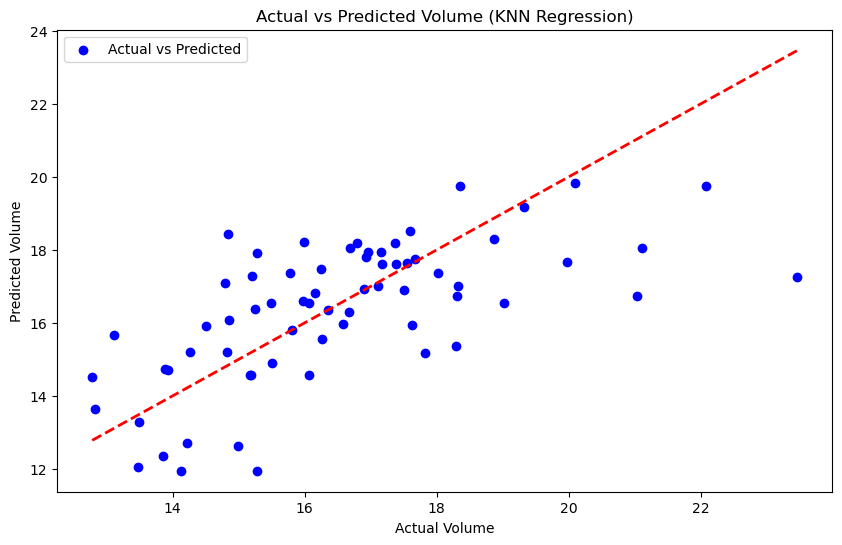

In [339]:
# Make predictions on the test set
y_pred = knn_reg.predict(X_test_scaled)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Volume')
plt.ylabel('Predicted Volume')
plt.title('Actual vs Predicted Volume (KNN Regression)')
plt.legend()
plt.show()


In [340]:
from sklearn.linear_model import LinearRegression

# Instantiate the Linear Regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train_scaled, y_train)

# Evaluate the model
train_score_linear = linear_reg.score(X_train_scaled, y_train)
test_score_linear = linear_reg.score(X_test_scaled, y_test)

print("Linear Regression Train R^2 Score:", train_score_linear)
print("Linear Regression Test R^2 Score:", test_score_linear)


Linear Regression Train R^2 Score: 0.6407395663093569
Linear Regression Test R^2 Score: 0.45167787400620374


In [341]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Define the degree of polynomial features
degree = 2  # You can adjust the degree as needed

# Instantiate PolynomialFeatures and LinearRegression
poly_features = PolynomialFeatures(degree=degree)
poly_reg = make_pipeline(poly_features, LinearRegression())

# Train the model
poly_reg.fit(X_train_scaled, y_train)

# Evaluate the model
train_score_poly = poly_reg.score(X_train_scaled, y_train)
test_score_poly = poly_reg.score(X_test_scaled, y_test)

print("Polynomial Regression Train R^2 Score:", train_score_poly)
print("Polynomial Regression Test R^2 Score:", test_score_poly)


Polynomial Regression Train R^2 Score: 0.9863698407759789
Polynomial Regression Test R^2 Score: -8.670580422338848e+17


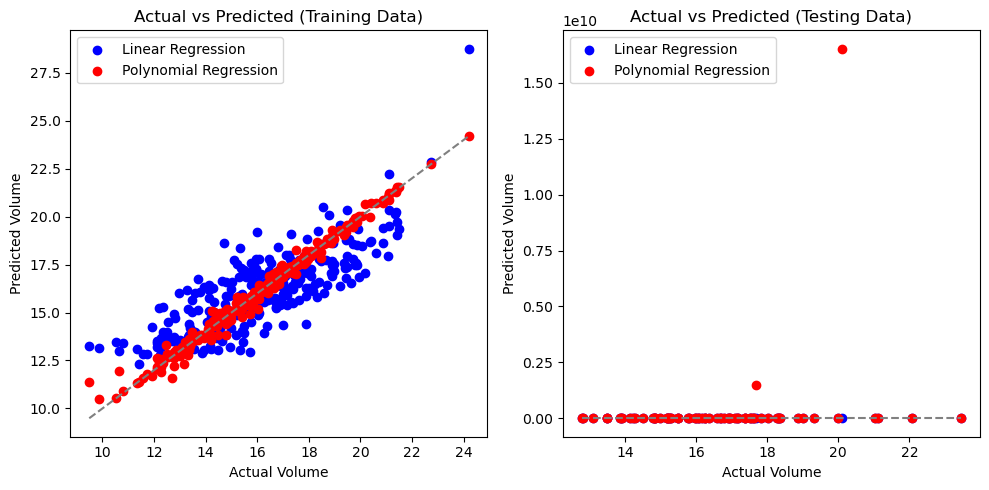

In [342]:
import matplotlib.pyplot as plt

# Predictions for linear regression
y_train_pred_linear = linear_reg.predict(X_train_scaled)
y_test_pred_linear = linear_reg.predict(X_test_scaled)

# Predictions for polynomial regression
y_train_pred_poly = poly_reg.predict(X_train_scaled)
y_test_pred_poly = poly_reg.predict(X_test_scaled)

# Plotting actual vs predicted values for training data
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_linear, color='blue', label='Linear Regression')
plt.scatter(y_train, y_train_pred_poly, color='red', label='Polynomial Regression')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color='gray')
plt.xlabel('Actual Volume')
plt.ylabel('Predicted Volume')
plt.title('Actual vs Predicted (Training Data)')
plt.legend()

# Plotting actual vs predicted values for testing data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_linear, color='blue', label='Linear Regression')
plt.scatter(y_test, y_test_pred_poly, color='red', label='Polynomial Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='gray')
plt.xlabel('Actual Volume')
plt.ylabel('Predicted Volume')
plt.title('Actual vs Predicted (Testing Data)')
plt.legend()

plt.tight_layout()
plt.show()
